<a href="https://colab.research.google.com/github/metaphorpritam/PythonTutorialFiles/blob/main/Sentiment_Analysis_with_LSTM(US_Airlines_Twitter_Review).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [ ]:
from bs4 import BeautifulSoup
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt  
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train  = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [ ]:
train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0.0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0.0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0.0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
test.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,Unnamed: 15,Unnamed: 16
0,5.700000e+17,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0.0,"@americanair new plane, #gogo, easy power for laptop, iPhone, just missing a good boat-style swivel cup holder for my #dietcoke #happyflier","[0.0, 0.0]",2/24/2015 9:23,"alexandria, va",Eastern Time (US & Canada),NaN,NaN
1,5.700000e+17,negative,1.0,longlines,0.6539,American,NaN,cmrqt,NaN,0.0,@AmericanAir how about some rampers at gate b40 dfw? Waiting to be marshaled in,NaN,2/24/2015 9:21,Everywhere,Central Time (US & Canada),NaN,NaN
2,5.700000e+17,negative,1.0,Cancelled Flight,0.6556,American,NaN,mmanny,NaN,0.0,@AmericanAir You Cancelled Flight my flight and there’s no way to rebook on the website or app? I have to wait 35 minutes on hold? #fail cc @Delta,NaN,2/24/2015 9:20,NYC,Eastern Time (US & Canada),NaN,NaN
3,5.700000e+17,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0.0,@AmericanAir I thought all those planes were retired? #MD80,NaN,2/24/2015 9:20,United States,Mountain Time (US & Canada),NaN,NaN
4,5.700000e+17,positive,1.0,NaN,NaN,American,NaN,superyan,NaN,0.0,Just got off the phone @AmericanAir customer service. Only 8 minutes to get my issue resoled. You guys are awesome.,NaN,2/24/2015 9:19,NaN,NaN,NaN,NaN


In [ ]:
print(train.shape)
print(test.shape)

(14640, 15)
(5325, 17)


In [ ]:
combi = train.append(test, ignore_index=True, sort = True) 
combi.shape

(19965, 17)

In [ ]:
train_clean = combi.copy()
train_clean = train_clean[train_clean['airline_sentiment_confidence'] > 0.65]

train_clean['text_clean'] = train_clean['text'].apply(lambda x: BeautifulSoup(x, "lxml").text)

In [ ]:
train_clean.head()

,Unnamed: 15,Unnamed: 16,airline,airline_sentiment,airline_sentiment_confidence,airline_sentiment_gold,name,negativereason,negativereason_confidence,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,text_clean
0,NaN,NaN,Virgin America,neutral,1.0000,NaN,cairdin,NaN,NaN,NaN,0.0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,5.703060e+17,NaN,Eastern Time (US & Canada),@VirginAmerica What @dhepburn said.
2,NaN,NaN,Virgin America,neutral,0.6837,NaN,yvonnalynn,NaN,NaN,NaN,0.0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/2015 11:15,5.703010e+17,Lets Play,Central Time (US & Canada),@VirginAmerica I didn't today... Must mean I need to take another trip!
3,NaN,NaN,Virgin America,negative,1.0000,NaN,jnardino,Bad Flight,0.7033,NaN,0.0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/2015 11:15,5.703010e+17,NaN,Pacific Time (US & Canada),"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,NaN,NaN,Virgin America,negative,1.0000,NaN,jnardino,Can't Tell,1.0000,NaN,0.0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/2015 11:14,5.703010e+17,NaN,Pacific Time (US & Canada),@VirginAmerica and it's a really big bad thing about it
5,NaN,NaN,Virgin America,negative,1.0000,NaN,jnardino,Can't Tell,0.6842,NaN,0.0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2/24/2015 11:14,5.703010e+17,NaN,Pacific Time (US & Canada),@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA


In [ ]:
def loadNclean(train):
    train['text_clean'] = train['text_clean'].apply(lambda x: x.lower())
    train['text_clean'] = train['text_clean'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
    return train

max_words = 500
train = loadNclean(train_clean)

negative    8787
neutral     2700
positive    2164
Name: airline_sentiment, dtype: int64


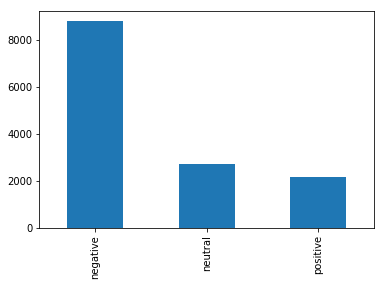

In [ ]:
print(train['airline_sentiment'].value_counts())
train['airline_sentiment'].value_counts().plot(kind = 'bar')

In [ ]:
tok = Tokenizer(nb_words=max_words, split=' ')
tok.fit_on_texts(train['text_clean'].values)
X = tok.texts_to_sequences(train['text_clean'].values)
X = pad_sequences(X)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
Y = pd.get_dummies(train['airline_sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(11603, 30) (11603, 3)
(2048, 30) (2048, 3)


In [ ]:
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from keras.optimizers import Adam
from keras.utils import to_categorical
from nltk.stem import PorterStemmer
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import losses
from keras.optimizers import SGD
from keras import optimizers

In [ ]:
MAX_REVIEW_LENGTH = 49
FEATURE_LENGTH = 12011
BATCH_SIZE = 1048
EPOCHS = 8

In [ ]:
embed_dim = 128
max_features=10000
lstm_out = 196

model= Sequential()
model.add(Embedding(FEATURE_LENGTH,250,mask_zero=True))
model.add(LSTM(128,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 250)         3002750   
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 128)         194048    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 3,246,401
Trainable params: 3,246,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train, nb_epoch=8, batch_size=32, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/8
 - 129s - loss: 0.6375 - acc: 0.7418
Epoch 2/8
 - 120s - loss: 0.5066 - acc: 0.8032
Epoch 3/8
 - 124s - loss: 0.4845 - acc: 0.8123
Epoch 4/8
 - 123s - loss: 0.4747 - acc: 0.8150
Epoch 5/8
 - 126s - loss: 0.4611 - acc: 0.8214
Epoch 6/8
 - 122s - loss: 0.4424 - acc: 0.8281
Epoch 7/8
 - 127s - loss: 0.4351 - acc: 0.8270
Epoch 8/8
 - 126s - loss: 0.4262 - acc: 0.8314


In [ ]:
pred = model.predict(X_test)  
print(pred)

[[8.5099143e-01 1.1900267e-01 3.0005941e-02]
 [9.9002892e-01 6.8167993e-03 3.1542995e-03]
 [7.9747730e-01 1.8009594e-02 1.8451309e-01]
 ...
 [9.9624217e-01 3.2104896e-03 5.4735137e-04]
 [9.8830485e-01 1.0128616e-02 1.5665881e-03]
 [9.7129953e-01 2.6174327e-02 2.5261231e-03]]


In [ ]:
print('Precision score: ', precision_score(Y_test.argmax(axis=1), pred.argmax(axis=1), average=None))
print('recall score: ', recall_score(Y_test.argmax(axis=1), pred.argmax(axis=1), average=None))
print('Accuracy Score: ', accuracy_score(Y_test.argmax(axis=1), pred.argmax(axis=1)))

Precision score:  [0.86087571 0.62674095 0.8021978 ]
recall score:  [0.91106129 0.59840426 0.65568862]
Accuracy Score:  0.81201171875


<Figure size 432x288 with 0 Axes>

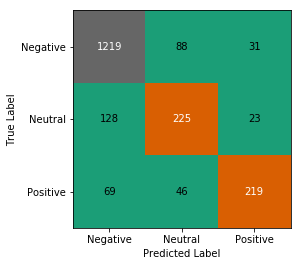

In [ ]:
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))

from mlxtend.plotting import plot_confusion_matrix

plt.figure()
plot_confusion_matrix(matrix ,cmap=plt.cm.Dark2)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'],color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()